# 101.3. Remote file access with WebDAV

<div style="max-width:300px; float: left; margin-right: 1em">

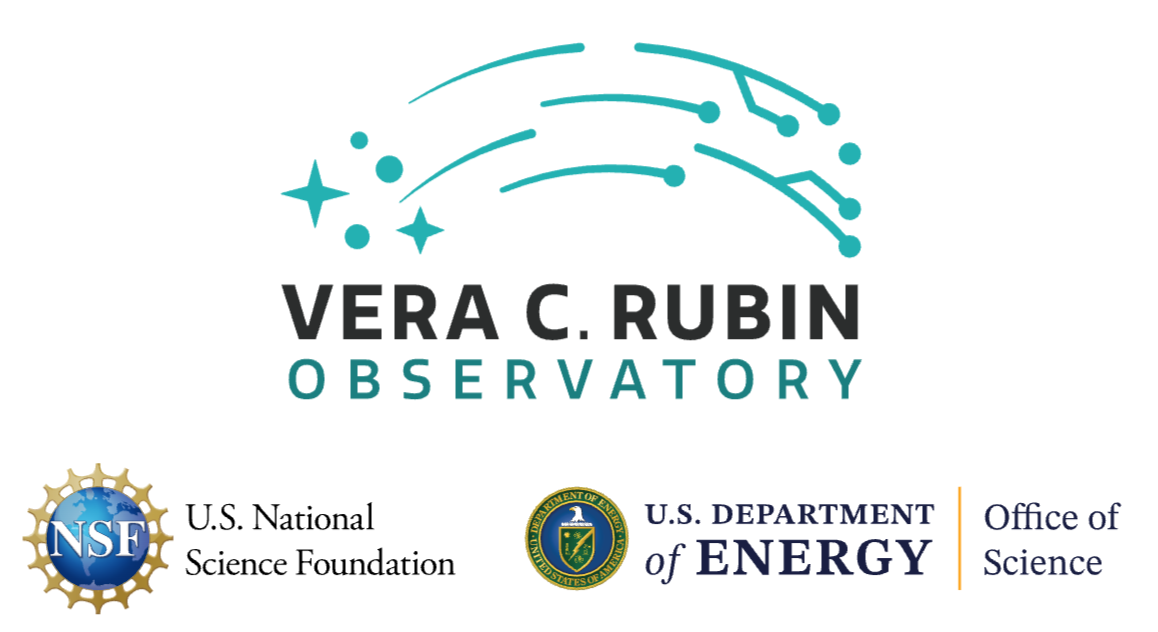

</div>

For the Rubin Science Platform at data.lsst.cloud.\
Data Release: <a href="https://dp1.lsst.io">Data Preview 1</a>\
Container Size: Small\
LSST Science Pipelines version:v29.2.0\
Last verified to run: 2026-01-12\
Repository: [github.com/lsst/tutorial-notebooks](https://github.com/lsst/tutorial-notebooks)\
DOI: [10.11578/rubin/dc.20250909.20](https://doi.org/10.11578/rubin/dc.20250909.20)

**Learning objective:** Use the RSP's WebDAV service to edit and transfer files.

**LSST data products:** None

**Packages:** None

**Credit:**
Originally developed by the Rubin Community Science team, based on documentation developed by Rubin staff.
Please consider acknowledging them if this notebook is used for the preparation of journal articles, software releases, or other notebooks.

**Get Support:**
Everyone is encouraged to ask questions or raise issues in the [Support Category](https://community.lsst.org/c/support) of the Rubin Community Forum.
Rubin staff will respond to all questions posted there.

## 1. Introduction

[WebDAV](https://en.wikipedia.org/wiki/WebDAV) (Web Distributed Authoring and Versioning) is a protocol that enables the creation and transfer of documents.

In the context of the Rubin Science Platform's [API Aspect](https://rsp.lsst.io/guides/api/index.html), the [RSP's WebDAV service](https://rsp.lsst.io/guides/webdav/index.html) allows users authenticated access from their own computer to files stored in their Notebook Aspect home directory, for editing or transfer.

**Related tutorials:** None.

### 1.1. Import packages

Import `os`, a python module for using the operating system ([os documentation](https://docs.python.org/3/library/os.html)), and `subprocess`, a python module for running command line functionality ([subprocess documentation](https://docs.python.org/3/library/subprocess.html)).

In [ ]:
import os
import subprocess

## 2. Create a temporary file

Create a temporary file with a few lines of text to use in this tutorial.

Define the file name as `temp_webdav_tutorial.dat`, and the file path as the "home" directory.

In [ ]:
filename = os.getenv("HOME") + "/temp_webdav_tutorial.txt"
print(filename)

Write two lines to the file. This will overwrite the file if it already exists.

In [ ]:
fout = open(filename, 'w')
fout.write('# this is a temporary file \n')
fout.write('hello world')
fout.close()

Use the `subprocess` module to run the Linux `cat` (concatenate) command on the newly created file. When run on the terminal command line, `cat` displays the contents of the file. When run with `subprocess` and `capture_output = True`, what would have been displayed in saved in `result`, and that standard output can then be displayed with `result.stdout`.

In [ ]:
result = subprocess.run(["cat", filename], capture_output=True, text=True)
print(result.stdout)

Clean up.

In [ ]:
del fout, result

## 3. Create a token

Create a token with the scope to `write:files`.

Follow these [instructions to create and save a token](https://rsp.lsst.io/guides/auth/creating-user-tokens.html).
In Step 4, ensure that the box next to `write:files` is checked.

Save the token in a file on your own computer.

## 4. Connect to a WebDAV client

Navigate to [data.lsst.cloud/files](https://data.lsst.cloud/files/) and wait for the page to load.
The delay is the time it takes to start your personal WebDAV server if it is not running already.

<div style="max-width:400px; float: left; margin-right: 1em">

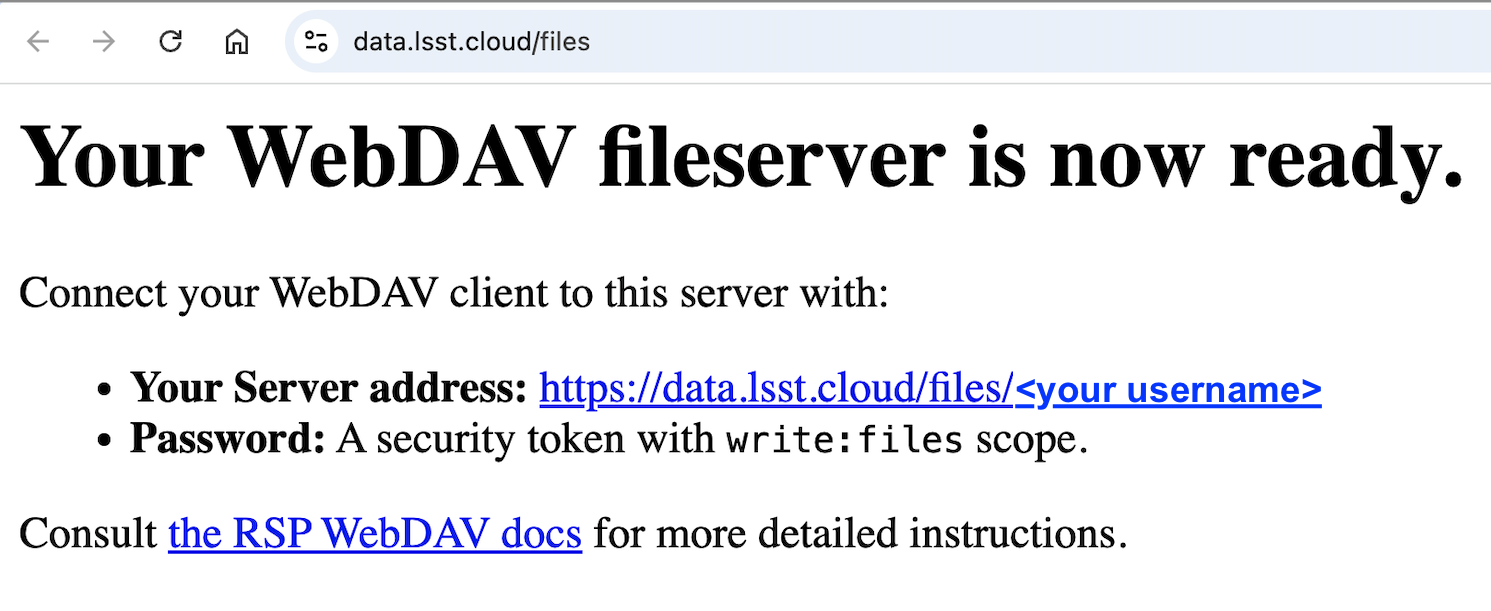

</div>

>**Figure 1:** The default page shown in the browser after loading the WebDAV server.

Note that the server address is not a link. Clicking on it will lead to a page that says "Method Not Allowed" and is otherwise blank.

**Choose a client.**
Most operating systems support WebDAV:
* Mac users can use Finder
* Linux users can use a file manager such as Nautilus or Dolphin
* Windows users can use File Explorer

There are also third-party clients. For example, Mac and Windows can use the [Cyberduck](https://cyberduck.io/) cloud storage browser.

#### 4.1. MacOS and Finder

Open the Finder app.
In the menu bar, select "Go" and then "Connect to Server".
The pop-up window shown in Figure 2 (below) will appear.
Enter your server address and click "Connect".

<div style="max-width:400px; float: left; margin-right: 1em">

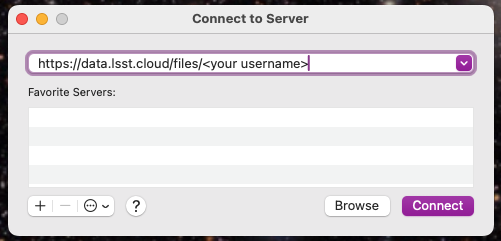

</div>

> **Figure 2:** The "Connect to Server" pop-up window. The top field might at first be blank, or might look similar to this example. Edit it to ensure the entire URL matches your WebDAV server address from Figure 1.

A new pop-up window will open.
Enter your RSP username next to "Name" and copy-past your token into the "Password" box, then click "Connect".

<div style="max-width:350px; float: left; margin-right: 1em">

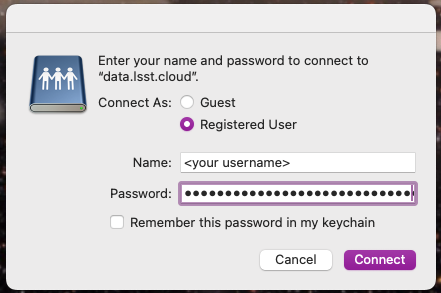

</div>

> **Figure 3:** The final pop-up window to connect to the WebDAV server.

A new Finder window or tab should automatically open, and will be connected to the RSP Notebook Aspect's home directory.

If this does not happen, either open a new Finder window and select "data.lsst.cloud" in the left menu bar, or double-click on the new "network" icon that has appeared on the Desktop.

In that Finder window, navigate to your personal home directory folder.
It might take a few seconds for the folder contents to load.

<div style="max-width:400px; float: left; margin-right: 1em">

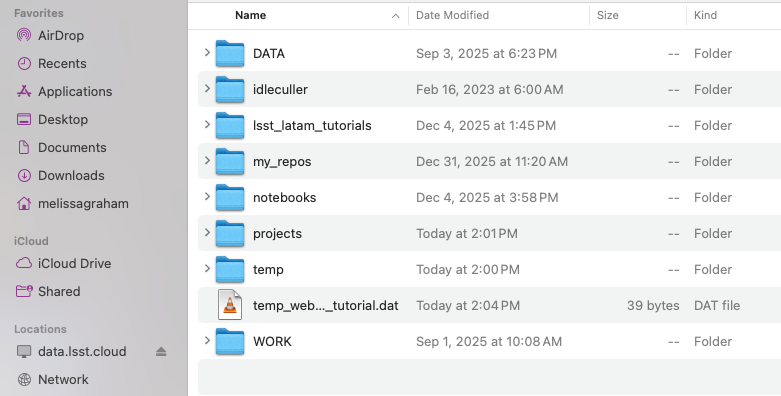

</div>

> **Figure 4:** A MacOS Finder window, which has been navigated to this tutorial developer's home directory.

Notice that the file created in Section 2 is visible.

#### 4.2. Windows and File Explorer

Open File Explorer, on the right hand side, right-click "This PC", then click "Map network drive...".

<div style="max-width:300px; float: left; margin-right: 1em">

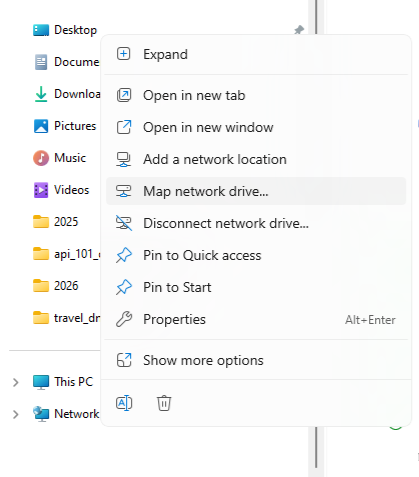

</div>

> **Figure 5:** Windows File Explorer, right-click "This PC", select "Map network drive..." option selected.

Enter the drive letter, copy the WebDAV file folder location (see figure 1), then select "Reconnect at sign-in" and "Connect using different credentials" options. Click "Finish".

<div style="max-width:500px; float: left; margin-right: 1em">

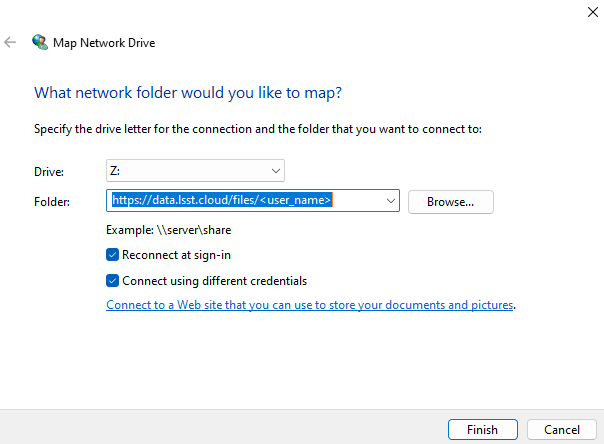

</div>

> **Figure 6:** Enter file path from Figure 1, select options for mapping network drive. 

Add user name and token to the pop-up.

<div style="max-width:400px; float: left; margin-right: 1em">

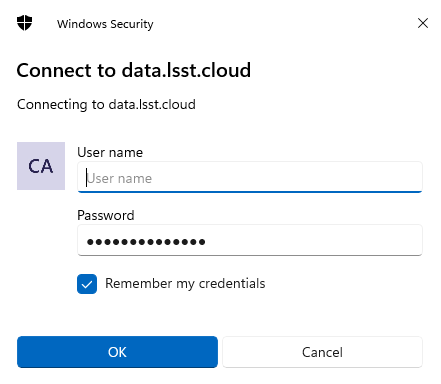

</div>

> **Figure 7:** Enter username, use the token created from the RSP as the password, select (optional) "Remember my credentials". 

Click "This PC", select the drive created in Figure 6, click home, click user name to view files. 

<div style="max-width:600px; float: left; margin-right: 1em">

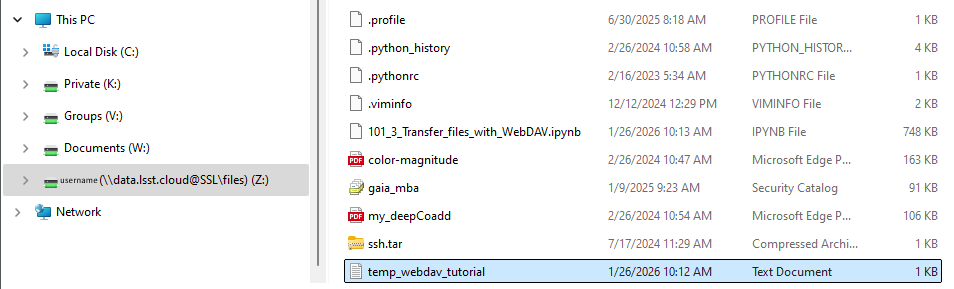

</div>

> **Figure 8:** Windows File Explorer with "temp_webdav_tutorial.txt" document.

### 4.3. Linux

Instructions to be added for the use of, e.g., [Dolphin](https://apps.kde.org/dolphin/) for WebDAV with Linux.

## 5. Alter the temporary file

Open the temporary file with the application of your choice on your own laptop.

Add a line to the bottom of the file, e.g., "well hello yourself". Save the file.

A warning might pop up, saying, e.g., that the document is on a volume that does not support permanent version storage. Click OK.

Rerun the `subprocess` to print the contents of the file and see that it has been updated.

In [ ]:
result = subprocess.run(["cat", filename], capture_output=True, text=True)
print(result.stdout)

## 6. Transfer files

Using the file manager window (e.g., MacOS Finder), drag-and-drop to move files between your laptop and your RSP home directory.

## 7. Terminal access

The terminal command line can also be used to read, edit, and copy files.

The WebDAV server will be mounted as a volume, named for your RSP username.

For example, in a MacOS terminal, volumes are mounted in `/Volumes` and the following command will print the contents of the file:

```cat /Volumes/<your-rsp-username>/home/<your-rsp_username>/temp_webdav_tutorial.txt```

The following command will copy the file to your own computer's home directory:

```cp /Volumes/<your-rsp-username>/home/<your-rsp_username>/temp_webdav_tutorial.txt ~/.```

## 8. Delete temporary file

Option to delete the temporary file.

In [ ]:
# result = subprocess.run(["rm", filename])